In [75]:
#Loading up modules

import os, cv2, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
import datetime
from tqdm import tqdm
from collections import Counter

from sklearn.metrics import precision_score, recall_score, f1_score

<center><font size="+2">Importing, Inspecting, and splitting the data into validation set</font></center>

In [2]:
#import data from csv into DF

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_for_sub = pd.read_csv('test.csv')

In [3]:
train.shape

(7613, 5)

In [4]:
test.shape

(3263, 4)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
#checking for null values

train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [8]:
#filling in na values with no_key and no_loc respectively

train['keyword'].fillna(value="no_key", inplace=True)
train['location'].fillna(value="no_loc", inplace=True)

test['keyword'].fillna(value="no_key", inplace=True)
test['location'].fillna(value="no_loc", inplace=True)

In [9]:
train.isna().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [10]:
test.isna().sum()

id          0
keyword     0
location    0
text        0
dtype: int64

In [11]:
train.nunique()

id          7613
keyword      222
location    3342
text        7503
target         2
dtype: int64

In [12]:
#too many unique values for location and after inspecting the data it is extremely messy, dropping this column
#example being UK, United Kingdom, London, UK, London, United Kingdom

train.drop(columns='location', inplace=True)
test.drop(columns='location', inplace=True)

In [13]:
#looking at top words for target = 1

train['keyword'][train['target']==1].value_counts()

no_key         42
wreckage       39
derailment     39
outbreak       39
debris         37
               ..
body%20bag      1
epicentre       1
electrocute     1
ruin            1
blazing         1
Name: keyword, Length: 221, dtype: int64

In [14]:
#dropping id column and splitting out validation set

train.drop(columns='id', inplace=True)
test.drop(columns='id', inplace=True)

train_encode = train.drop(columns='target')

In [57]:
train_x = train.drop(columns='target')
train_y = train['target']

<center><font size="+2">Encoding the text via Tokenizing</font></center>

In [16]:
tokenizer = keras.preprocessing.text.Tokenizer()

In [17]:
#creating list of all words in training keyword and text

train_list = train_encode['keyword'] + " " + train_encode['text']

In [18]:
tokenizer.fit_on_texts(train_list)

In [19]:
tokenizer.sequences_to_texts([[0, 5, 9, 19, 50, 100, 200, 500, 1000]])

['a and at body us outbreak around friend']

In [112]:
count = list(range(0, len(train_x)))

train_x_enc = pd.DataFrame()

for i in count:
    x = np.array(tokenizer.texts_to_sequences([train_x['keyword'][i]]))
    y = np.array(tokenizer.texts_to_sequences([train_x['text'][i]]))
    
    x_df = pd.DataFrame(x)
    y_df = pd.DataFrame(y)
    
    z = pd.concat([x_df, y_df], axis=1)
    z.columns = range(z.shape[1])
    train_x_enc = pd.concat([train_x_enc, z], axis=0)

In [113]:
train_x_enc

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,32,345,130.0,4663.0,24.0,4.0,901.0,8.0,21.0,156.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,32,345,103.0,36.0,397.0,837.0,6984.0,6985.0,1438.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,32,345,42.0,1783.0,1653.0,7.0,6986.0,6.0,6987.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,32,345,869.0,2952.0,62.0,4665.0,1533.0,168.0,1439.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,32,345,35.0,111.0,1256.0,21.0,476.0,22.0,6989.0,2190.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,32,345,126.0,894.0,1406.0,1124.0,5.0,229.0,118.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,32,345,6950.0,6951.0,6952.0,4.0,40.0,8.0,791.0,191.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,32,345,2855.0,2432.0,751.0,1249.0,1640.0,1641.0,117.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,32,345,73.0,1180.0,43.0,45.0,648.0,2343.0,185.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
count = list(range(0, len(test)))

test_enc = pd.DataFrame()

for i in count:
    x = np.array(tokenizer.texts_to_sequences([test['keyword'][i]]))
    y = np.array(tokenizer.texts_to_sequences([test['text'][i]]))
    
    x_df = pd.DataFrame(x)
    y_df = pd.DataFrame(y)
    
    z = pd.concat([x_df, y_df], axis=1)
    z.columns = range(z.shape[1])
    test_enc = pd.concat([test_enc, z], axis=0)

In [115]:
test_enc

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,32,345.0,35.0,947.0,5.0,1982.0,146.0,84.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,32,345.0,564.0,58.0,156.0,11.0,1236.0,2679.0,664.0,2352.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,32,345.0,85.0,11.0,5.0,103.0,36.0,19.0,860.0,3606.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,32,345.0,320.0,3970.0,7698.0,1533.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,32,345.0,138.0,833.0,567.0,2595.0,6.0,976.0,9.0,1241.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,32,345.0,156.0,1155.0,2964.0,2965.0,511.0,1155.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,32,345.0,83.0,6.0,9330.0,1183.0,86.0,176.0,184.0,15.0,...,226.0,500.0,9334.0,95.0,439.0,572.0,NaN,NaN,NaN,NaN
0,32,345.0,1002.0,747.0,197.0,6.0,941.0,3.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,32,345.0,6399.0,659.0,265.0,429.0,1781.0,1954.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
train_x_enc.shape

(7613, 35)

In [117]:
test_enc.shape

(3263, 31)

In [34]:
#attempted function to encode text, didn't work

'''def encode_text(data):
    count = list(range(0, len(data)-1))
    enc_matrix = []
    enc_df = pd.DataFrame()
    enc_df2 = pd.DataFrame()
    for column in data:
        
        for i in count:
            
            enc_data = np.array(tokenizer.texts_to_sequences([data[column][i]]))
            df = pd.DataFrame(enc_data)
            enc_df2 = pd.concat([enc_df2, df], axis=0)
            i = i+1
            
        enc_df = pd.concat([enc_df, enc_df2], axis=1)
        
    return enc_df'''

In [71]:
#train_ready = train_x['text']
#test_ready = test['text']

In [73]:
#def preprocess(x_batch, y_batch):
#    x_batch = tf.strings.regex_replace(x_batch, b"<br\\s*/?>", b" ")
#    x_batch = tf.strings.regex_replace(x_batch, b"[^a-zA-Z']", b" ")
#    x_batch = tf.strings.split(x_batch)
#    return x_batch.to_tensor(default_value=b"<pad>"), y_batch

In [76]:
#vocabulary = Counter()
#for x_batch, y_batch in train_ready.batch(32).map(preprocess):
#    for text in x_batch:
#        vocabulary.update(list(review.numpy()))

AttributeError: 'Series' object has no attribute 'batch'

In [118]:
#filling NaN with 0

train_x_enc = train_x_enc.fillna(0)
test_enc = test_enc.fillna(0)

<center><font size="+2">Building the RNN</font></center>

In [140]:
#building the layers

embed_size = 256
model = keras.models.Sequential([
    keras.layers.Embedding(22731,embed_size, input_shape=[None]),
    keras.layers.GRU(256, return_sequences=True),
    keras.layers.GRU(256),
    keras.layers.Dense(1, activation="sigmoid")
])

In [141]:
#setting optimzer and loss function and early callback

optimizer = keras.optimizers.Adam()
loss = 'binary_crossentropy'
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [142]:
#compiling model

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])

In [143]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history = model.fit(train_x_enc, train_y, epochs=50, validation_split=0.1, callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/50
215/215 [==============================] - 35s 148ms/step - loss: 0.6873 - accuracy: 0.5681 - val_loss: 0.5460 - val_accuracy: 0.7402
Epoch 2/50
215/215 [==============================] - 33s 155ms/step - loss: 0.4994 - accuracy: 0.7835 - val_loss: 0.4494 - val_accuracy: 0.8097
Epoch 3/50
215/215 [==============================] - 33s 153ms/step - loss: 0.2505 - accuracy: 0.9117 - val_loss: 0.5838 - val_accuracy: 0.7559
Epoch 4/50
215/215 [==============================] - 32s 149ms/step - loss: 0.0788 - accuracy: 0.9762 - val_loss: 0.7616 - val_accuracy: 0.7349
Epoch 5/50
215/215 [==============================] - 33s 152ms/step - loss: 0.0432 - accuracy: 0.9865 - val_loss: 0.8692 - val_accuracy: 0.6916
Epoch 6/50
215/215 [==============================] - 32s 149ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.9581 - val_accuracy: 0.7336
Epoch 7/50
215/215 [==============================] - 32s 149ms/step - loss: 0.0154 - accuracy: 0.9929 - val_loss: 1.2159 - val_ac

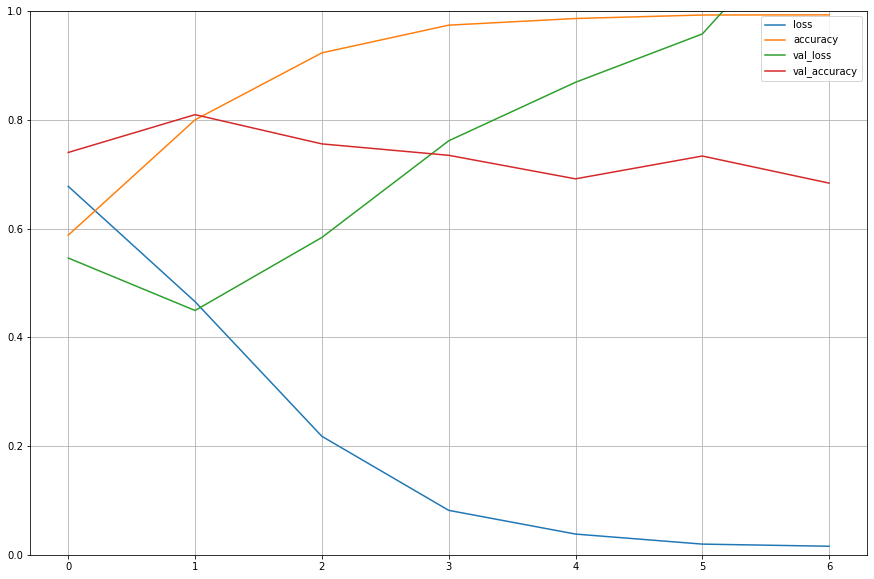

In [144]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [145]:
predictions = model.predict(test_enc)

In [146]:
predictions_check = (predictions > 0.5).astype(int)

In [147]:
df1 = pd.DataFrame({
        'id':test_for_sub['id'],
        'target': predictions_check[:,0]
         })

df1.to_csv('submission1_NLP.csv', index=False)

<center><font size="+2">Building the second, deeper RNN</font></center>

In [132]:
#building the layers

embed_size = 128
model2 = keras.models.Sequential([
    keras.layers.Embedding(22731,embed_size, input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation="sigmoid")
])

In [133]:
#setting optimzer and loss function and early callback

optimizer = keras.optimizers.Adam()
loss = 'binary_crossentropy'
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [134]:
#compiling model

model2.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])

In [135]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history = model2.fit(train_x_enc, train_y, epochs=50, validation_split=0.1, callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/50
215/215 [==============================] - 26s 84ms/step - loss: 0.6598 - accuracy: 0.6101 - val_loss: 0.5049 - val_accuracy: 0.7690
Epoch 2/50
215/215 [==============================] - 16s 76ms/step - loss: 0.3772 - accuracy: 0.8574 - val_loss: 0.5814 - val_accuracy: 0.7257
Epoch 3/50
215/215 [==============================] - 17s 79ms/step - loss: 0.2246 - accuracy: 0.9252 - val_loss: 0.4838 - val_accuracy: 0.7756
Epoch 4/50
215/215 [==============================] - 17s 77ms/step - loss: 0.1357 - accuracy: 0.9596 - val_loss: 0.5661 - val_accuracy: 0.7625
Epoch 5/50
215/215 [==============================] - 16s 76ms/step - loss: 0.0670 - accuracy: 0.9826 - val_loss: 0.7412 - val_accuracy: 0.7270
Epoch 6/50
215/215 [==============================] - 17s 79ms/step - loss: 0.0403 - accuracy: 0.9905 - val_loss: 0.8566 - val_accuracy: 0.7257
Epoch 7/50
215/215 [==============================] - 17s 79ms/step - loss: 0.0297 - accuracy: 0.9920 - val_loss: 1.0707 - val_accuracy:

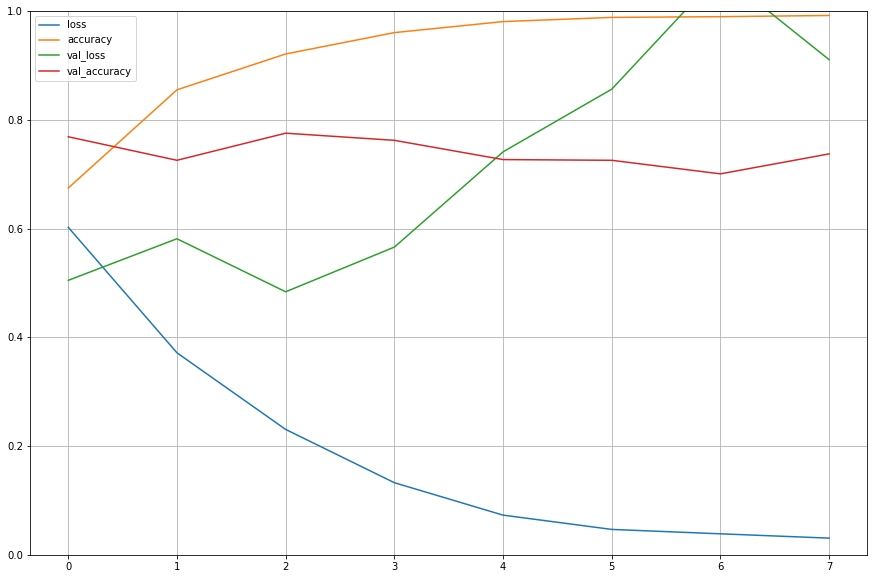

In [136]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [137]:
predictions2 = model2.predict(test_enc)

In [138]:
predictions2_check = (predictions2 > 0.5).astype(int)

In [139]:
df2 = pd.DataFrame({
        'id':test_for_sub['id'],
        'target': predictions2_check[:,0]
         })

df2.to_csv('submission2_NLP.csv', index=False)